In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [109]:
# load dataset and show the first five sample
df = pd.read_csv(' https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [110]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Annual Income (k$)": "AnnualIncome", "Spending Score (1-100)": "SpendingScore"})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [111]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [112]:
# Check for null values in the dataset
null_values = df.isnull().sum()
null_values

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


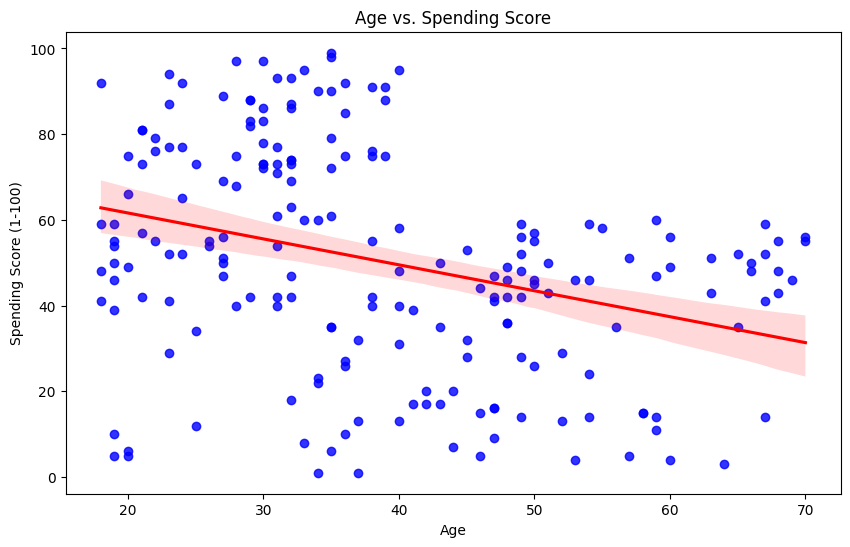

In [113]:
# make an insightful visualization and explain
# Create scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(x="Age", y="SpendingScore", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Age vs. Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

#plot ini menunjukkan bahwa pengeluaran cenderung sedikit menurun seiring bertambahnya usia,
# dengan perilaku pengeluaran yang lebih beragam pada pelanggan muda, sedangkan pelanggan yang lebih tua lebih cenderung memiliki skor pengeluaran yang lebih rendah.

## Data Preprocessing

For this case study, we only use income and spending score

In [114]:
# create new dataframe that consist only annual income and spending score
df = df[['AnnualIncome', 'SpendingScore']]
df.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [115]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df), columns=["income", "spending"])
df.head()


,income,spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [116]:
# get stastical information on the new dataset
df.describe()

,income,spending
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

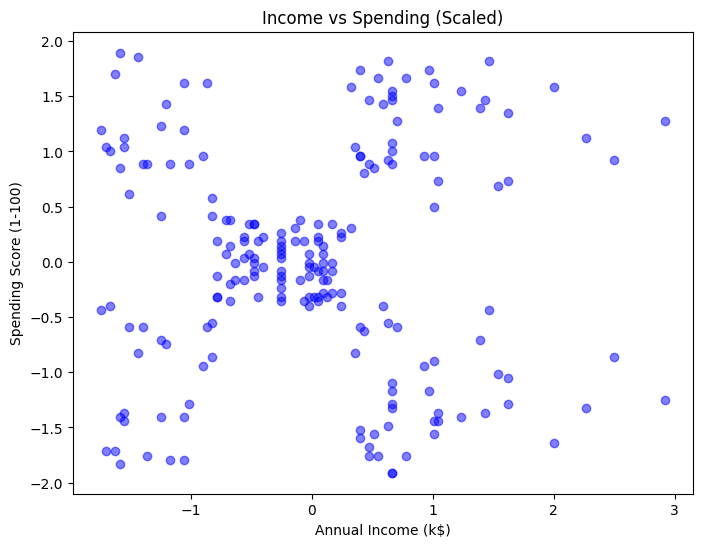

In [117]:
# Visualize the position
plt.figure(figsize=(8, 6))
plt.scatter(df['income'], df['spending'], color='blue', alpha=0.5)
plt.title('Income vs Spending (Scaled)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

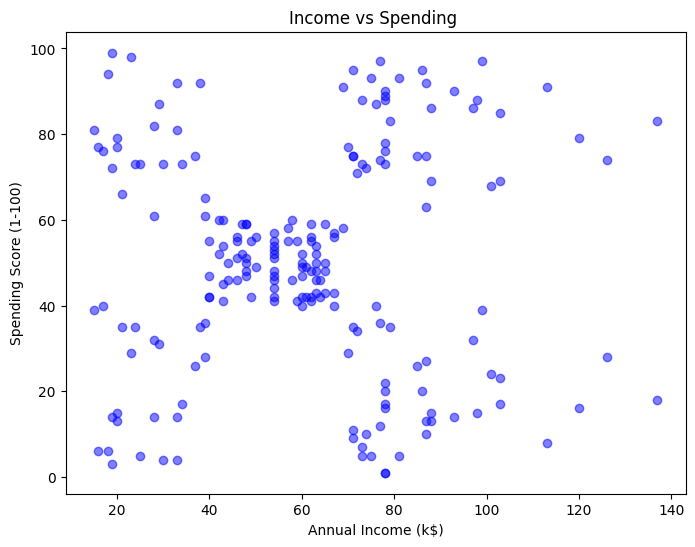

In [118]:
# Visualize the position using the original scale
# Inverse transform to get back to the original scale
df_inverse = pd.DataFrame(sc.inverse_transform(df), columns=["income", "spending"])

plt.figure(figsize=(8, 6))
plt.scatter(df_inverse['income'], df_inverse['spending'], color='blue', alpha=0.5)
plt.title('Income vs Spending ')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [119]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans
# set the parameter for evaluating K
sse = []
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

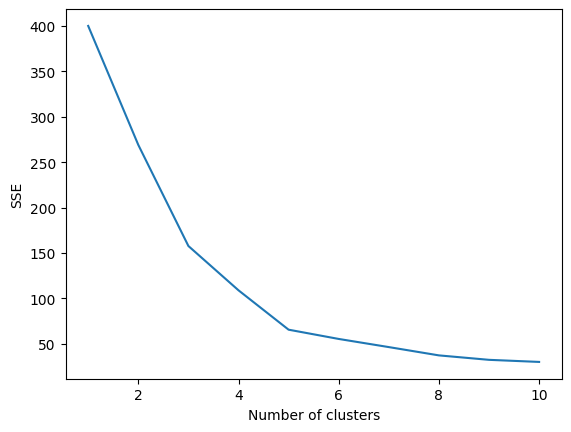

In [120]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [121]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print("The best k for your model is", kneedle.elbow)

The best k for your model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [122]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

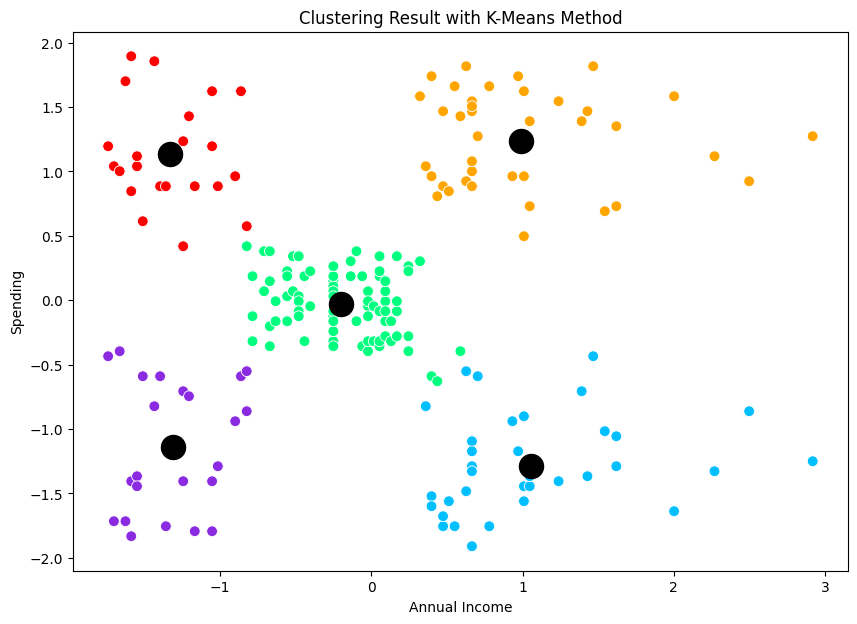

In [123]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))

sns.scatterplot(x="income", y="spending", hue=y_pred, palette=[
    "blueviolet",
    "red",
    "deepskyblue",
    "orange",
    "springgreen"
], legend=None, data=df, s=60)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Annual Income")
plt.ylabel("Spending")
plt.title("Clustering Result with K-Means Method")
plt.show()


In [124]:
# Inverse transform the scaled data to get the original values
df = pd.DataFrame(sc.inverse_transform(df), columns=["AnnualIncome", "SpendingScore"])
# Add the cluster labels to the original data
df['Cluster'] = y_pred
# Analyze the clusters with the original values
df.head()


,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [125]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_pred).agg({
    'SpendingScore': ['mean', 'std', 'min', 'max'],
    'AnnualIncome': ['mean', 'std', 'min', 'max']
})
cluster_summary = cluster_summary.rename_axis('cluster')
cluster_summary


SpendingScore                        AnnualIncome                   \
                 mean        std   min   max         mean        std   min   
cluster                                                                      
0           20.913043  13.017167   3.0  40.0    26.304348   7.893811  15.0   
1           79.363636  10.504174  61.0  99.0    25.727273   7.566731  15.0   
2           17.114286   9.952154   1.0  39.0    88.200000  16.399067  70.0   
3           82.128205   9.364489  63.0  97.0    86.538462  16.312485  69.0   
4           49.518519   6.530909  34.0  61.0    55.296296   8.988109  39.0   

                
           max  
cluster         
0         39.0  
1         39.0  
2        137.0  
3        137.0  
4         76.0


1. **Cluster 0**:
   - **Rata-rata SpendingScore**: 20.91 (rendah)
   - **Rata-rata AnnualIncome**: 26.30 (rendah)
   - **Interpretasi**: Pelanggan di kelompok ini memiliki pendapatan dan skor pengeluaran yang rendah, yang menunjukkan bahwa mereka mungkin kurang tertarik untuk melakukan pembelian atau mungkin memiliki keterbatasan keuangan.
   - **Rekomendasi**: Perusahaan bisa mengembangkan strategi untuk meningkatkan daya tarik produk bagi kelompok ini, seperti memberikan diskon atau penawaran khusus. Namun, perusahaan juga perlu mempertimbangkan apakah biaya yang dikeluarkan untuk menarik kelompok ini sebanding dengan potensi keuntungan.

2. **Cluster 1**:
   - **Rata-rata SpendingScore**: 79.36 (tinggi)
   - **Rata-rata AnnualIncome**: 25.73 (rendah)
   - **Interpretasi**: Kelompok ini memiliki pengeluaran yang tinggi meskipun pendapatannya rendah. Mereka cenderung menjadi pembeli impulsif atau loyal terhadap produk perusahaan.
   - **Rekomendasi**: Perusahaan dapat mempertahankan pelanggan ini dengan program loyalitas atau promosi eksklusif, untuk memastikan mereka tetap melakukan pembelian. Karena kelompok ini memiliki pengeluaran tinggi, memberikan pengalaman berbelanja yang lebih baik bisa meningkatkan loyalitas mereka.

3. **Cluster 2**:
   - **Rata-rata SpendingScore**: 17.11 (rendah)
   - **Rata-rata AnnualIncome**: 88.20 (tinggi)
   - **Interpretasi**: Kelompok ini memiliki pendapatan yang tinggi tetapi skor pengeluarannya rendah. Mereka mungkin adalah pelanggan yang lebih selektif atau tidak tertarik dengan produk saat ini.
   - **Rekomendasi**: Perusahaan bisa melakukan pendekatan berbeda dengan menawarkan produk atau layanan premium yang lebih sesuai dengan preferensi mereka, atau mengedukasi mereka mengenai nilai produk melalui kampanye yang meningkatkan awareness.

4. **Cluster 3**:
   - **Rata-rata SpendingScore**: 82.13 (tinggi)
   - **Rata-rata AnnualIncome**: 86.54 (tinggi)
   - **Interpretasi**: Pelanggan dalam kelompok ini memiliki pendapatan dan pengeluaran yang tinggi, menjadikannya kelompok paling potensial dalam hal kontribusi terhadap penjualan.
   - **Rekomendasi**: Fokus pada kelompok ini dengan menawarkan produk eksklusif, program VIP, atau layanan yang lebih personal untuk meningkatkan pengalaman berbelanja mereka dan mendorong pembelian lebih lanjut.

5. **Cluster 4**:
   - **Rata-rata SpendingScore**: 49.52 (sedang)
   - **Rata-rata AnnualIncome**: 55.30 (sedang)
   - **Interpretasi**: Kelompok ini memiliki pendapatan dan pengeluaran yang sedang, sehingga mungkin memiliki minat terhadap produk tertentu tetapi dengan anggaran yang terbatas.
   - **Rekomendasi**: Perusahaan dapat mempertahankan kelompok ini dengan memberikan promosi atau diskon secara berkala. Selain itu, memastikan produk terjangkau dengan kualitas baik bisa menarik kelompok ini untuk lebih sering melakukan pembelian.

**Kesimpulan**:
Strategi pemasaran yang berbeda perlu diterapkan untuk setiap cluster agar perusahaan bisa memaksimalkan potensi dari setiap segmen pelanggan. Dengan memahami karakteristik tiap cluster, perusahaan dapat mengoptimalkan strategi promosi, produk, dan layanan sesuai dengan kebutuhan masing-masing kelompok pelanggan.

<write here>